In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
pd.set_option('display.max_columns', None)
plotly.tools.set_credentials_file(username='jacky920236', api_key='MWEVmNLzns7pkjvXDWHU')


In [3]:
def describe_pd_data(pd_data):
    print("Data columns:")
    print(pd_data.info())
    print("__________________________________________________________________")
    print("Data head:")
    print(pd_data.head())
    print("__________________________________________________________________")
    print("Data length:")
    print(len(pd_data))


In [4]:
# Load data
order = pd.read_csv("./Dataset/Orders.csv", dtype="unicode")
describe_pd_data(order)


Data columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5495276 entries, 0 to 5495275
Data columns (total 28 columns):
DateId                         object
MemberId                       object
OrderGroupCode                 object
TrackSourceTypeDef             object
TrackDeviceTypeDef             object
PayProfileTypeDef              object
SalesOrderSlaveId              object
SalePageId                     object
IsMajor                        object
IsGift                         object
IsSalePageGift                 object
Quantity                       object
UnitPrice                      object
PromotionDiscount              object
ECouponId                      object
ECouponDiscount                object
SalesOrderSlaveTotalPayment    object
SalesOrderSlaveDateTime        object
SalesOrderReceiverId           object
City                           object
District                       object
ZipCode                        object
StoreName                      object

In [ ]:
# order_group = pd.read_csv("./Dataset/MemberLabel.csv", dtype="unicode")
# member = pd.read_csv("./Dataset/Member.csv", dtype="unicode")
# each_order = pd.read_csv("./Dataset/EachOrder.csv", dtype="unicode")
# each_order = each_order.sort_values(by=["DateId"])


In [ ]:
# describe_pd_data(target_order)


In [ ]:
# Select main product and complete order only
target_order = order.loc[(order["IsMajor"] == "True") & (order["IsGift"] == "False") & (order["IsSalePageGift"] == "False") & (order["StatusDef"] == "Finish")]
target_order = target_order.drop(columns=["IsMajor", "IsGift", "IsSalePageGift", "StatusDef"])

# Drop invalid city names
target_order = target_order.loc[(target_order["City"] != "<fo") & (target_order["City"] != "1st") & (target_order["City"] != "Tao") & (target_order["City"] != "New") & (target_order["City"] != "Kao")]

# Columns to datetime
target_order["DateId"] = pd.to_datetime(target_order["DateId"].astype(str), format="%Y%m%d")
target_order["SalesOrderSlaveDateTime"] = pd.to_datetime(target_order["SalesOrderSlaveDateTime"].astype(str), format="%Y-%m-%d %H:%M:%S.%f")

# Sort by datetime
target_order = target_order.sort_values(by=["DateId"])

# Cleaned data overview
describe_pd_data(target_order)

# Save cleaned data
target_order.to_csv("./Dataset/TargetOrders.csv", sep=",", encoding="utf-8", index=False)


In [5]:
target_order = pd.read_csv("./Dataset/TargetOrders.csv", dtype="unicode")
describe_pd_data(target_order)


Data columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080742 entries, 0 to 4080741
Data columns (total 24 columns):
DateId                         object
MemberId                       object
OrderGroupCode                 object
TrackSourceTypeDef             object
TrackDeviceTypeDef             object
PayProfileTypeDef              object
SalesOrderSlaveId              object
SalePageId                     object
Quantity                       object
UnitPrice                      object
PromotionDiscount              object
ECouponId                      object
ECouponDiscount                object
SalesOrderSlaveTotalPayment    object
SalesOrderSlaveDateTime        object
SalesOrderReceiverId           object
City                           object
District                       object
ZipCode                        object
StoreName                      object
StoreId                        object
DeliverTypeDef                 object
ReturnGoodsDateId              object

In [ ]:
# Columns to numeric
target_order[["SalesOrderSlaveTotalPayment","Quantity","PromotionDiscount","ECouponDiscount"]] = target_order[["SalesOrderSlaveTotalPayment","Quantity","PromotionDiscount","ECouponDiscount"]].apply(pd.to_numeric)

# Group each target order together by OrderGroupCode
agg_key = {"SalesOrderSlaveTotalPayment": "sum", "Quantity": "sum", "PromotionDiscount": "sum", "ECouponId": "first", "ECouponDiscount": "sum"}
shopping_cart = target_order.groupby("OrderGroupCode", as_index=False).agg(agg_key)

# Drop duplicated columns
target_order = target_order.drop(columns=["SalesOrderSlaveTotalPayment","Quantity","PromotionDiscount","ECouponId","ECouponDiscount","UnitPrice"])

# Merge groupby data back to original data
shopping_cart = shopping_cart.merge(target_order.groupby("OrderGroupCode", as_index=False).nth(0), on=["OrderGroupCode"], how="left")

# Grouped full data overview
describe_pd_data(shopping_cart)

# Save grouped data (Each row is a cart)
shopping_cart.to_csv("./Dataset/ShoppingCarts.csv", sep=",", encoding="utf-8", index=False)


In [7]:
shopping_cart = pd.read_csv("./Dataset/ShoppingCarts.csv", dtype="unicode")
shopping_cart[["SalesOrderSlaveTotalPayment","Quantity"]] = shopping_cart[["SalesOrderSlaveTotalPayment","Quantity"]].apply(pd.to_numeric)
shopping_cart = shopping_cart.loc[(shopping_cart["SalesOrderSlaveTotalPayment"] <= 5000) & (shopping_cart["Quantity"] <= 12)]
shopping_cart["DateId"] = pd.to_datetime(shopping_cart["DateId"].astype(str), format="%Y-%m-%d")
shopping_cart["SalesOrderSlaveDateTime"] = pd.to_datetime(shopping_cart["SalesOrderSlaveDateTime"].astype(str), format="%Y-%m-%d %H:%M:%S.%f")

describe_pd_data(shopping_cart)


Data columns:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1024634 entries, 0 to 1037352
Data columns (total 24 columns):
OrderGroupCode                 1024634 non-null object
SalesOrderSlaveTotalPayment    1024634 non-null float64
Quantity                       1024634 non-null int64
PromotionDiscount              1024634 non-null object
ECouponId                      1024634 non-null object
ECouponDiscount                1024634 non-null object
DateId                         1024634 non-null datetime64[ns]
MemberId                       1024634 non-null object
TrackSourceTypeDef             1024634 non-null object
TrackDeviceTypeDef             1024634 non-null object
PayProfileTypeDef              1024634 non-null object
SalesOrderSlaveId              1024634 non-null object
SalePageId                     1024634 non-null object
UnitPrice                      1024634 non-null object
SalesOrderSlaveDateTime        1024634 non-null datetime64[ns]
SalesOrderReceiverId           1

Data columns:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1024634 entries, 0 to 1037352
Data columns (total 12 columns):
SalesOrderSlaveTotalPayment    1024634 non-null float64
Quantity                       1024634 non-null int64
PromotionDiscount              1024634 non-null float64
ECouponDiscount                1024634 non-null float64
DateId                         1024634 non-null datetime64[ns]
TrackSourceTypeDef             1024634 non-null int8
TrackDeviceTypeDef             1024634 non-null int8
PayProfileTypeDef              1024634 non-null int8
UnitPrice                      1024634 non-null object
SalesOrderSlaveDateTime        1024634 non-null datetime64[ns]
City                           1024634 non-null int8
DeliverTypeDef                 1024634 non-null int8
dtypes: datetime64[ns](2), float64(3), int64(1), int8(5), object(1)
memory usage: 67.4+ MB
None
__________________________________________________________________
Data head:
   SalesOrderSlaveTotalPayment 

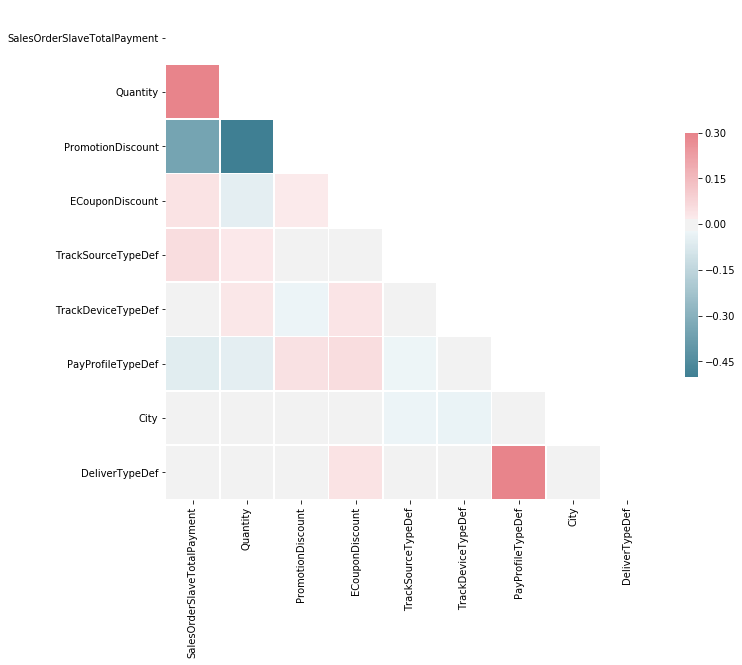

In [8]:
categorized_data = shopping_cart.copy()
categorized_data[["SalesOrderSlaveTotalPayment","Quantity","PromotionDiscount","ECouponDiscount"]] = categorized_data[["SalesOrderSlaveTotalPayment","Quantity","PromotionDiscount","ECouponDiscount"]].apply(pd.to_numeric)
categorized_data = categorized_data.drop(columns=["OrderGroupCode","ECouponId","MemberId","SalesOrderSlaveId","SalePageId","SalesOrderReceiverId","StoreName","StoreId","District","ZipCode","ReturnGoodsDateId","CauseDef"])
cat_code = ["TrackSourceTypeDef","TrackDeviceTypeDef","PayProfileTypeDef","City","DeliverTypeDef"]
for col in cat_code:
    categorized_data[col] = pd.Categorical(categorized_data[col])
    categorized_data[col] = categorized_data[col].cat.codes
describe_pd_data(categorized_data)

corr_matrix = categorized_data.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


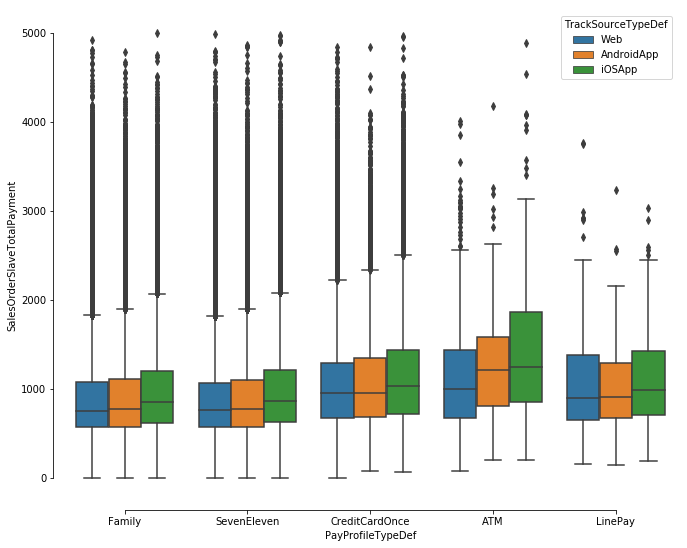

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="PayProfileTypeDef", y="SalesOrderSlaveTotalPayment",
            hue="TrackSourceTypeDef", data=shopping_cart)
sns.despine(offset=10, trim=True)


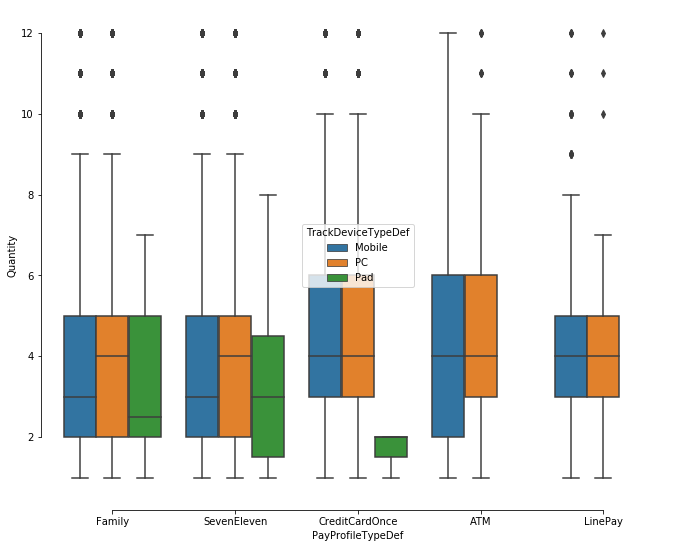

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="PayProfileTypeDef", y="Quantity",
            hue="TrackDeviceTypeDef", data=shopping_cart)
sns.despine(offset=10, trim=True)


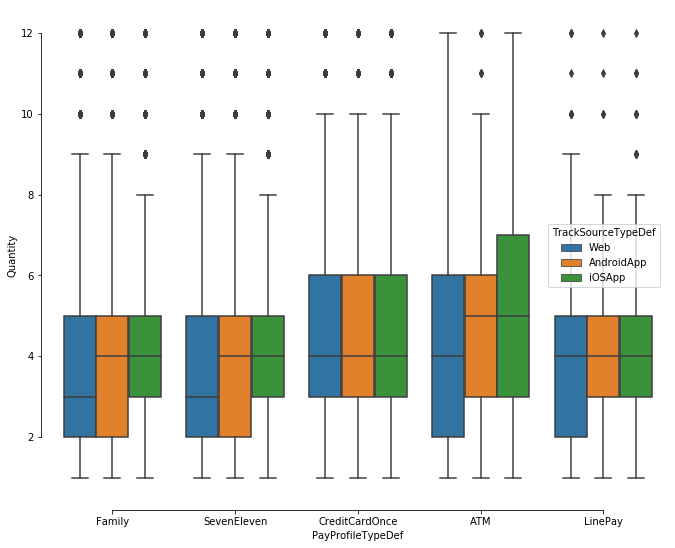

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="PayProfileTypeDef", y="Quantity",
            hue="TrackSourceTypeDef", data=shopping_cart)
sns.despine(offset=10, trim=True)


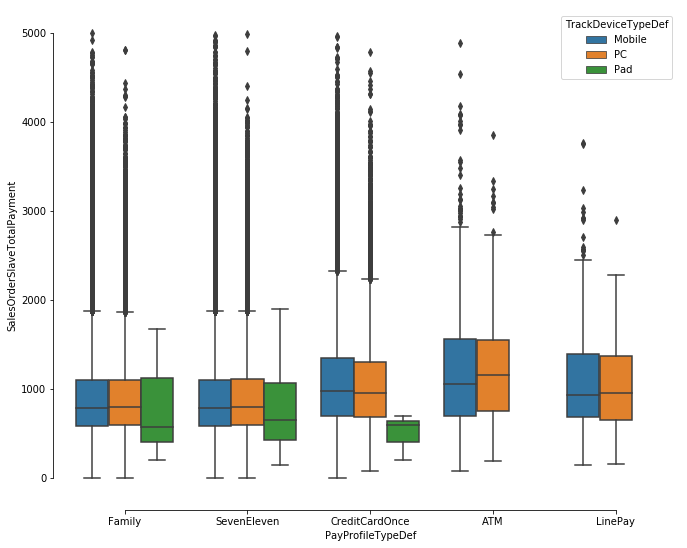

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="PayProfileTypeDef", y="SalesOrderSlaveTotalPayment",
            hue="TrackDeviceTypeDef", data=shopping_cart)
sns.despine(offset=10, trim=True)


In [ ]:
# Revenue by month
shopping_cart["Month"] = shopping_cart["DateId"].values.astype("datetime64[M]").astype(str)
revenue_by_month = shopping_cart.groupby("Month", as_index = False).agg({"SalesOrderSlaveTotalPayment":"sum"})
data_revenue_by_month = [
    go.Bar(
        x=revenue_by_month["Month"], 
        y=revenue_by_month["SalesOrderSlaveTotalPayment"],
        marker=dict(
            color='rgb(158,202,225)',
            line=dict(
                color='rgb(8,48,107)',
                width=1.5,
        )
    ),
    opacity=0.6
    )]
layout_revenue_by_month = go.Layout(
    title="Revenue by month",
    plot_bgcolor="rgba(245, 246, 249, 1)"
)
fig_revenue_by_month = go.Figure(data=data_revenue_by_month, layout=layout_revenue_by_month)
py.iplot(fig_revenue_by_month, filename="91APP_MonthlyRevenue", fileopt="extend")


D:\Program Files (x86)\Virtual_Environments\ENV\lib\site-packages\plotly\plotly\plotly.py:101: DeprecationWarning:

The fileopt parameter is deprecated and will be removed in plotly.py version 4

D:\Program Files (x86)\Virtual_Environments\ENV\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [ ]:
"""
# Price per product vs. Product quantity
data_price_to_quantity = [go.Scattergl(
    x=order_group["PricePerOrder"],
    y=order_group["QuantityPerOrder"],
    mode='markers',
    marker=dict(
            color='rgb(158,202,225)',
            line=dict(
                color='rgb(8,48,107)',
                width=0.5,
        ))
)]

plot_price_to_quantity = go.Figure(data=data_price_to_quantity)
py.iplot(plot_price_to_quantity, filename="91APP_PriceQuantity", fileopt="extend")
"""


In [ ]:
"""
# 每個用戶
x = pd.to_numeric(order_group["OrderCount"]).loc[order_group["OrderCount"] < 60].iloc[:1000].astype(int)
y = pd.to_numeric(order_group["TotalPrice"]).loc[order_group["TotalPrice"] < 100000].iloc[:1000].astype(int)
joint_reg_price_to_quantity = sns.jointplot(x=x, y=y, kind="reg").set_axis_labels("$Order Count$", "$Total Price$")
joint_kde_price_to_quantity = sns.jointplot(x=x, y=y, kind="kde", space=0).set_axis_labels("$Order Count$", "$Total Price$")
"""


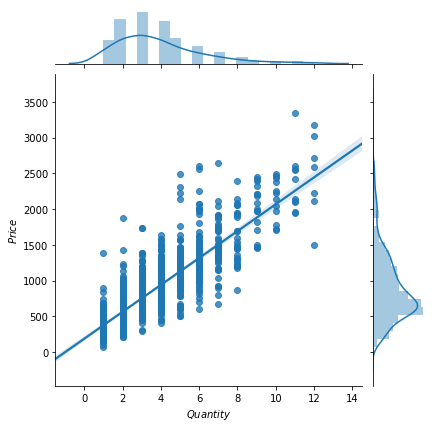

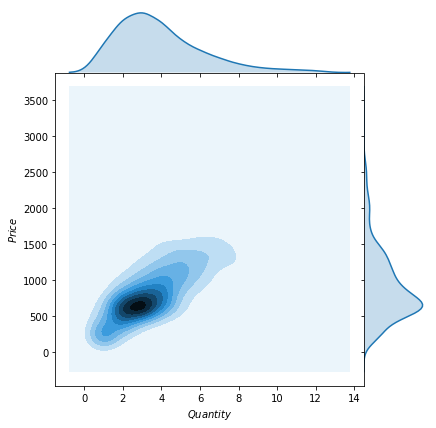

In [ ]:
# 每台購物車
x = pd.to_numeric(shopping_cart["Quantity"].iloc[:1000]).astype(int)
y = pd.to_numeric(shopping_cart["SalesOrderSlaveTotalPayment"].iloc[:1000]).astype(int)
joint_reg_price_to_quantity = sns.jointplot(x=x, y=y, kind="reg").set_axis_labels("$Quantity$", "$Price$")
joint_kde_price_to_quantity = sns.jointplot(x=x, y=y, kind="kde", space=0).set_axis_labels("$Quantity$", "$Price$")


In [ ]:
"""
test = target_order.iloc[:10000]
price_to_quantity = sns.jointplot(x="UnitPrice", y="Quantity", data=test, kind="kde", color="m")
price_to_quantity.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
price_to_quantity.ax_joint.collections[0].set_alpha(0)
price_to_quantity.set_axis_labels("$Price$", "$Quantity$")
"""


In [ ]:
# Load data
# ecoupon = pd.read_csv("./Dataset/ECoupon.csv", dtype="unicode")
# describe_pd_data(ecoupon)


In [10]:
promotion_order = pd.read_csv("./Dataset/PromotionOrders.csv", dtype="unicode")
describe_pd_data(promotion_order)


Data columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4011064 entries, 0 to 4011063
Data columns (total 13 columns):
SalesOrderSlaveId                               object
PromotionId                                     object
SalesOrderSlavePromotionDiscount                object
SalesOrderSlavePromotionDiscountAllocated       object
SalesOrderSlavePromotionDiscountAllocatedQty    object
SalesOrderSlavePromotionDiscountRate            object
DiscountType                                    object
PromotionCondition_DiscountPrice                object
PromotionCondition_DiscountRate                 object
PromotionCondition_TotalPrice                   object
PromotionCondition_TotalQty                     object
PromotionStartDateTime                          object
PromotionEndDateTime                            object
dtypes: object(13)
memory usage: 397.8+ MB
None
__________________________________________________________________
Data head:
  SalesOrderSlaveId PromotionId 

In [ ]:
# target_order = pd.read_csv("./Dataset/TargetOrders.csv", dtype="unicode")
# describe_pd_data(target_order)


In [ ]:
# promotion_order.loc[promotion_order["SalesOrderSlaveId"] == "48572103"]


In [ ]:
# Count each type of promotion
# promotion_type_count = pd.DataFrame(promotion_order["DiscountType"].value_counts())
# promotion_type_count.columns = ["Count"]
# promotion_type_count["DiscountType"] = promotion_type_count.index
# promotion_type_count
# sns.barplot(promotion_type_count)


In [11]:
promotion_order["DiscountType_Eng"] = promotion_order["DiscountType"].replace({
    '滿額打折': 'Discount with Purchase',
    '滿額折現': 'Cash with Purchase',
    '滿額贈': 'Gift with Purchase',
    '任選優惠價': 'Discount given Selection', 
    '滿件打折': 'Discount with Amount Purchase',
    '滿件折現': 'Cash with Amount Purchase', 
    '會員滿額打折': 'Member Discount'
    })


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

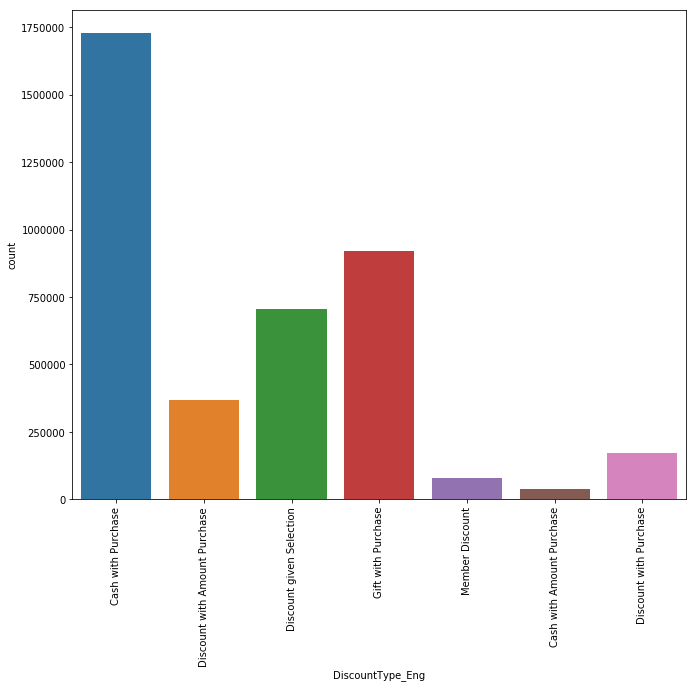

In [12]:
f, ax = plt.subplots(figsize=(11, 9))
sns.countplot(x="DiscountType_Eng", data=promotion_order)
plt.xticks(rotation=90)


In [13]:
# Promotion by month
promotion_order["PromotionStartDateTime"] = pd.to_datetime(promotion_order["PromotionStartDateTime"].astype(str), format="%Y-%m-%d %H:%M:%S.%f")
promotion_order = promotion_order.sort_values(by=["PromotionStartDateTime"])
promotion_order["Month"] = promotion_order["PromotionStartDateTime"].values.astype("datetime64[M]").astype(str)
promotion_order["Count"] = 1 
# promotion_by_month = promotion_order.groupby(["Month","DiscountType_Eng"], as_index = False).agg({"Count":"sum"})
promotion_by_month_2015 = promotion_order.loc[promotion_order["Month"].str.contains("2015")]
promotion_by_month_2016 = promotion_order.loc[promotion_order["Month"].str.contains("2016")]
promotion_by_month_2017 = promotion_order.loc[promotion_order["Month"].str.contains("2017")]
promotion_by_month_2018 = promotion_order.loc[promotion_order["Month"].str.contains("2018")]


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

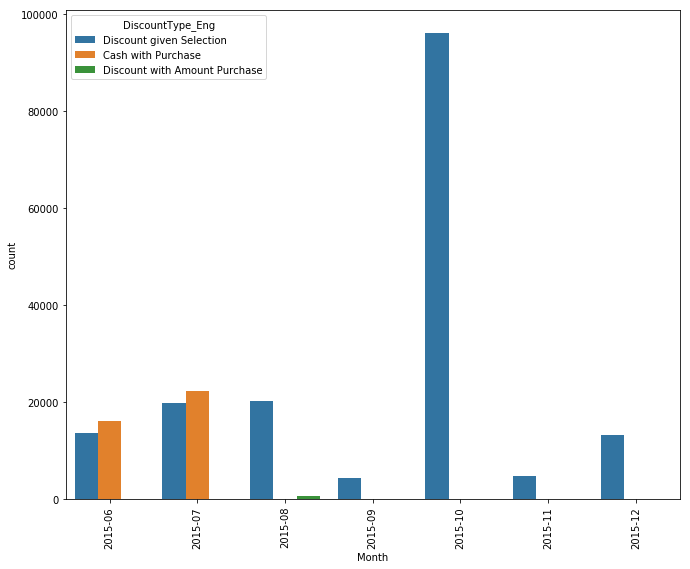

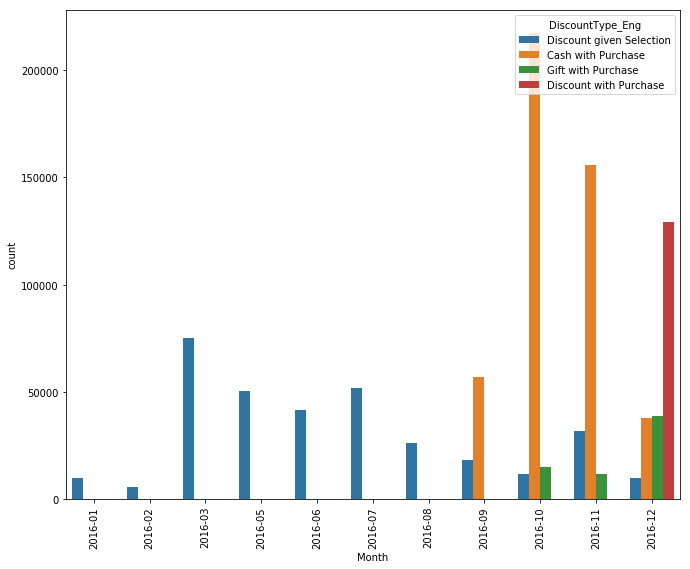

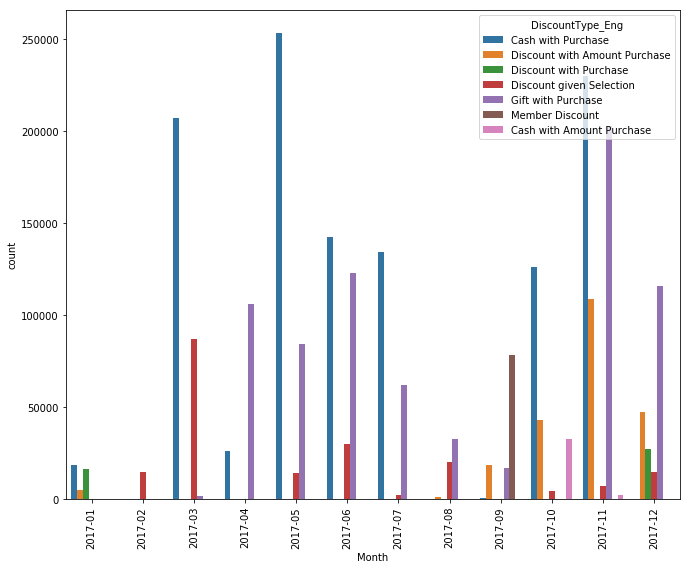

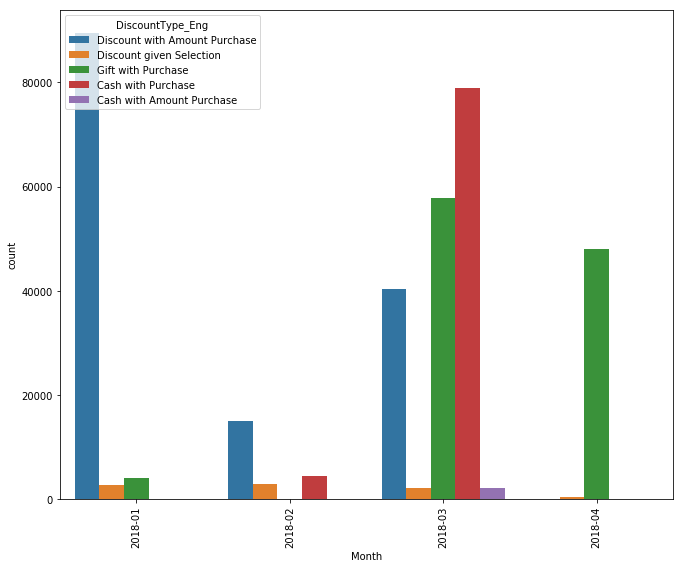

In [14]:
f, ax = plt.subplots(figsize=(11, 9))
sns.countplot(x="Month", hue="DiscountType_Eng", data=promotion_by_month_2015)
plt.xticks(rotation=90)

f, ax = plt.subplots(figsize=(11, 9))
sns.countplot(x="Month", hue="DiscountType_Eng", data=promotion_by_month_2016)
plt.xticks(rotation=90)

f, ax = plt.subplots(figsize=(11, 9))
sns.countplot(x="Month", hue="DiscountType_Eng", data=promotion_by_month_2017)
plt.xticks(rotation=90)

f, ax = plt.subplots(figsize=(11, 9))
sns.countplot(x="Month", hue="DiscountType_Eng", data=promotion_by_month_2018)
plt.xticks(rotation=90)

